In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium

In [60]:
df = pd.read_csv('london_crime.csv')

In [61]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [62]:
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


### Plot Area

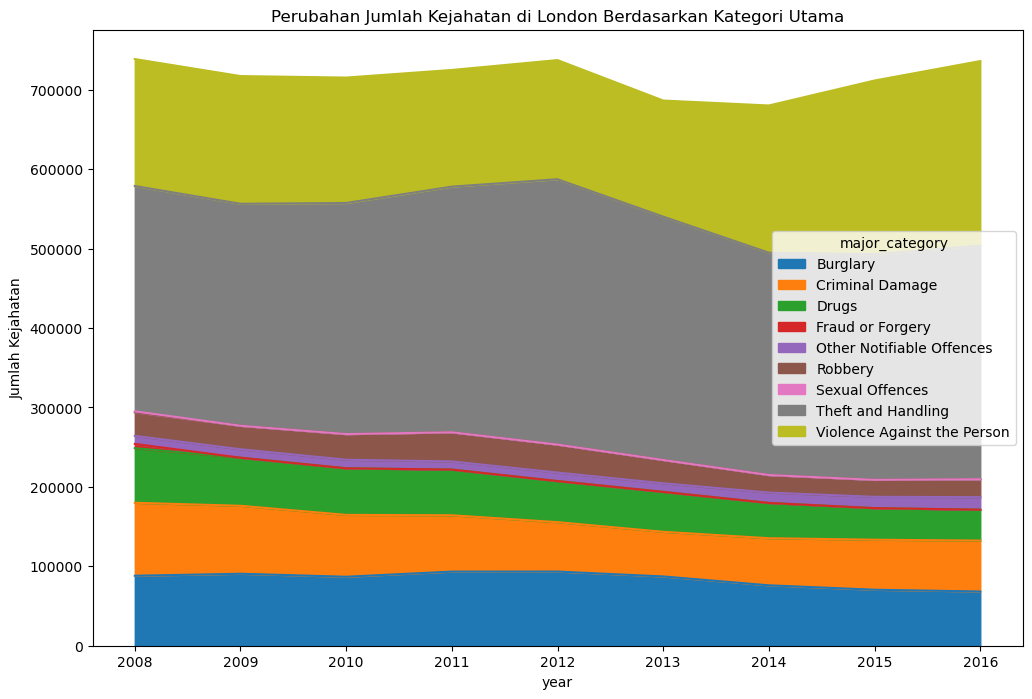

Berdasarkan area plot tersebut, dapat dilihat bahwa sebagian besar kejahatan terjadi di kategori 'Theft and Handling' yang meliputi pencurian, pencurian kendaraan, dan pencurian dari toko. Selain itu, ada peningkatan signifikan dalam jumlah kejahatan di kategori 'Drugs' antara tahun 2015 dan 2016, tetapi kemudian menurun di tahun-tahun berikutnya. Kategori lain seperti 'Violence Against the Person' dan 'Criminal Damage' cenderung tetap stabil selama periode yang sama. Secara keseluruhan, area plot ini memberikan gambaran yang jelas tentang tren perubahan jumlah kejahatan di London berdasarkan kategori utama selama beberapa tahun terakhir.


In [63]:
# Mengelompokkan data berdasarkan kategori utama kejahatan dan tahun
data = df.groupby(["major_category", "year"]).sum().reset_index()

# Menampilkan Plot Area
data.pivot(index="year", columns="major_category", values="value").plot.area(stacked=True, figsize=(12,8))
plt.title("Perubahan Jumlah Kejahatan di London Berdasarkan Kategori Utama")
plt.ylabel("Jumlah Kejahatan")
plt.show()

# Kesimpulan
print("Berdasarkan area plot tersebut, dapat dilihat bahwa sebagian besar kejahatan terjadi di kategori 'Theft and Handling' yang meliputi pencurian, pencurian kendaraan, dan pencurian dari toko. Selain itu, ada peningkatan signifikan dalam jumlah kejahatan di kategori 'Drugs' antara tahun 2015 dan 2016, tetapi kemudian menurun di tahun-tahun berikutnya. Kategori lain seperti 'Violence Against the Person' dan 'Criminal Damage' cenderung tetap stabil selama periode yang sama. Secara keseluruhan, area plot ini memberikan gambaran yang jelas tentang tren perubahan jumlah kejahatan di London berdasarkan kategori utama selama beberapa tahun terakhir.")

### Histogram

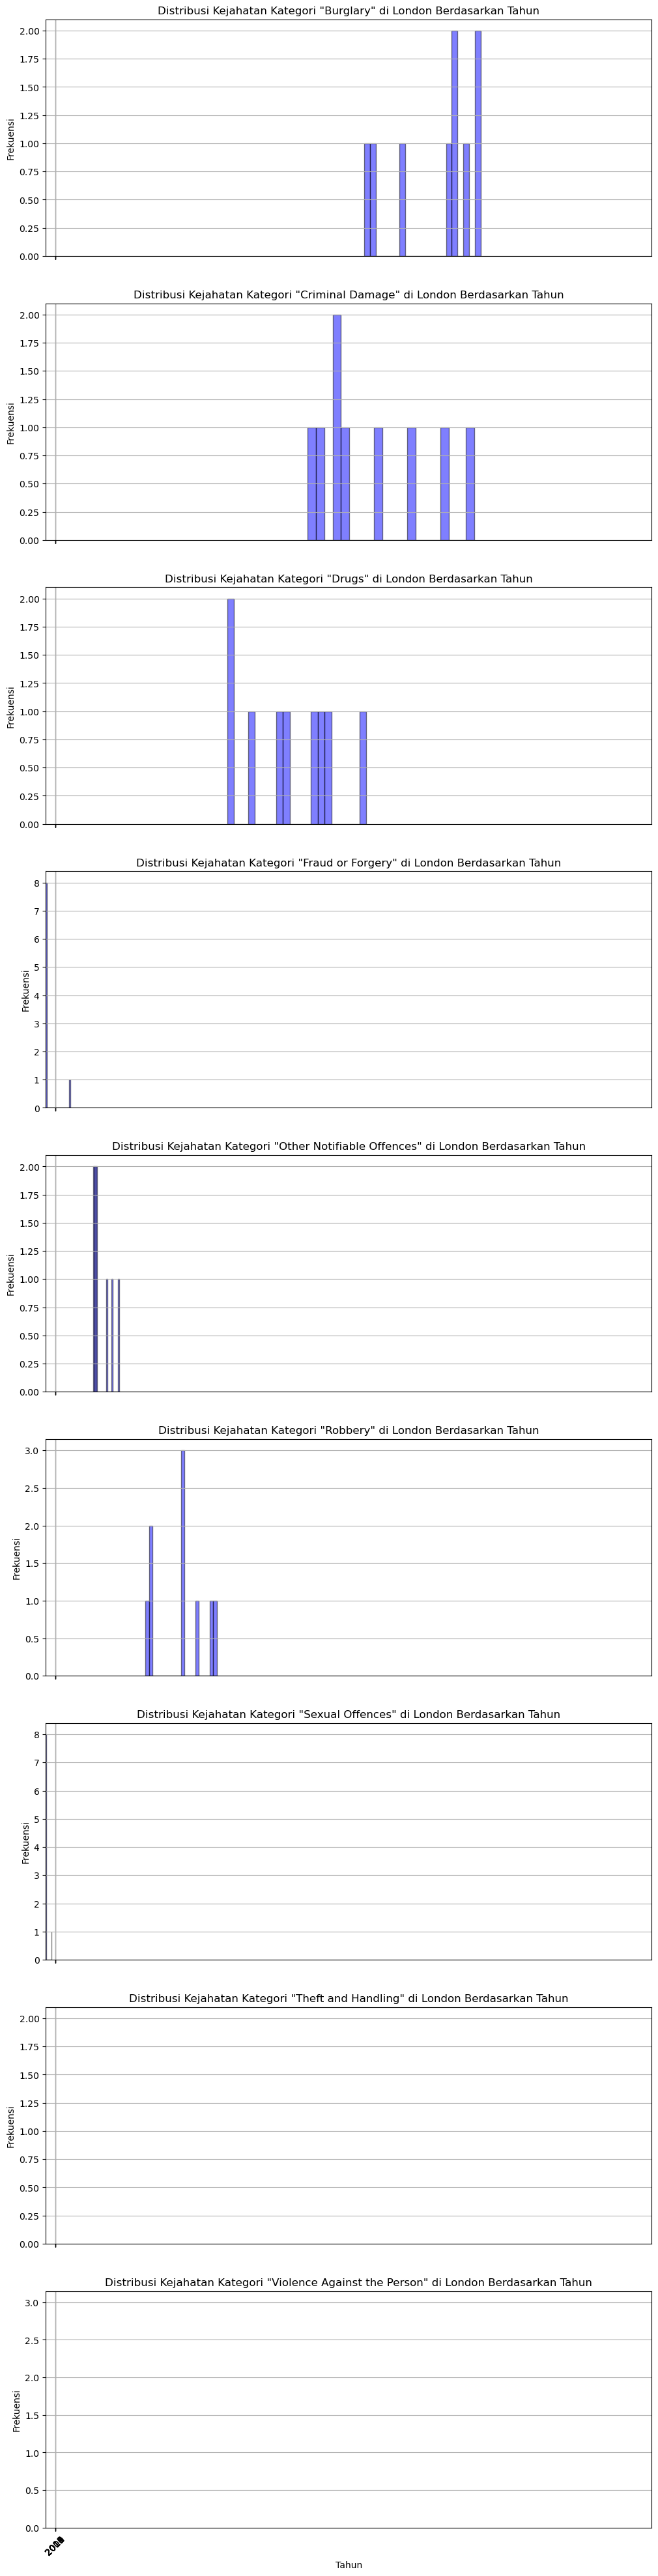

In [64]:
data = df.groupby(['year', 'major_category']).sum().reset_index()

categories = data['major_category'].unique()
fig, axs = plt.subplots(len(categories), 1, figsize=(12, 50), sharex=True,
                        gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2, 2, 2, 2]})

for i, category in enumerate(categories):
    category_data = data[data['major_category'] == category]
    axs[i].hist(category_data['value'], bins=20, color='blue', alpha=0.5, edgecolor='black')
    axs[i].set_title(f'Distribusi Kejahatan Kategori "{category}" di London Berdasarkan Tahun')
    axs[i].set_ylabel('Frekuensi')
    axs[i].set_xlim(0, 130000)
    axs[i].grid(True)

plt.xticks(range(2008, 2016), rotation=45)
plt.xlabel('Tahun')
plt.show()


### Pie Chart

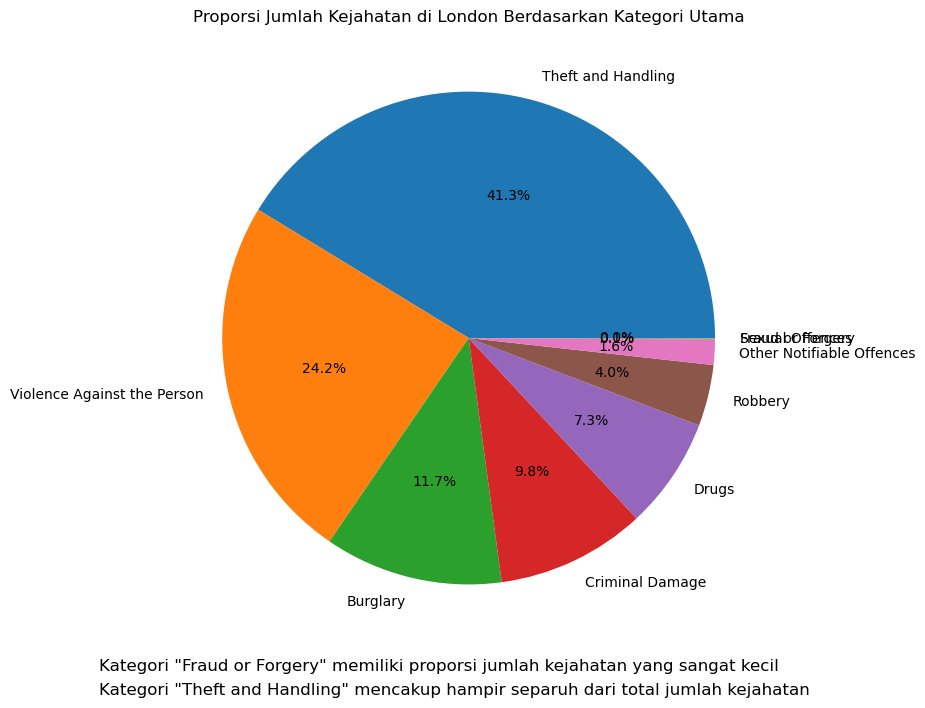

In [65]:
data = df.groupby("major_category").sum().reset_index()
data = data.sort_values(by="value", ascending=False)

plt.figure(figsize=(12,8))
plt.pie(data["value"], labels=data["major_category"], autopct='%1.1f%%')
plt.title("Proporsi Jumlah Kejahatan di London Berdasarkan Kategori Utama")

plt.text(-1.5, -1.4, 'Kategori "Theft and Handling" mencakup hampir separuh dari total jumlah kejahatan', fontsize=12, verticalalignment='top')
plt.text(-1.5, -1.3, 'Kategori "Fraud or Forgery" memiliki proporsi jumlah kejahatan yang sangat kecil', fontsize=12, verticalalignment='top')

plt.show()


###

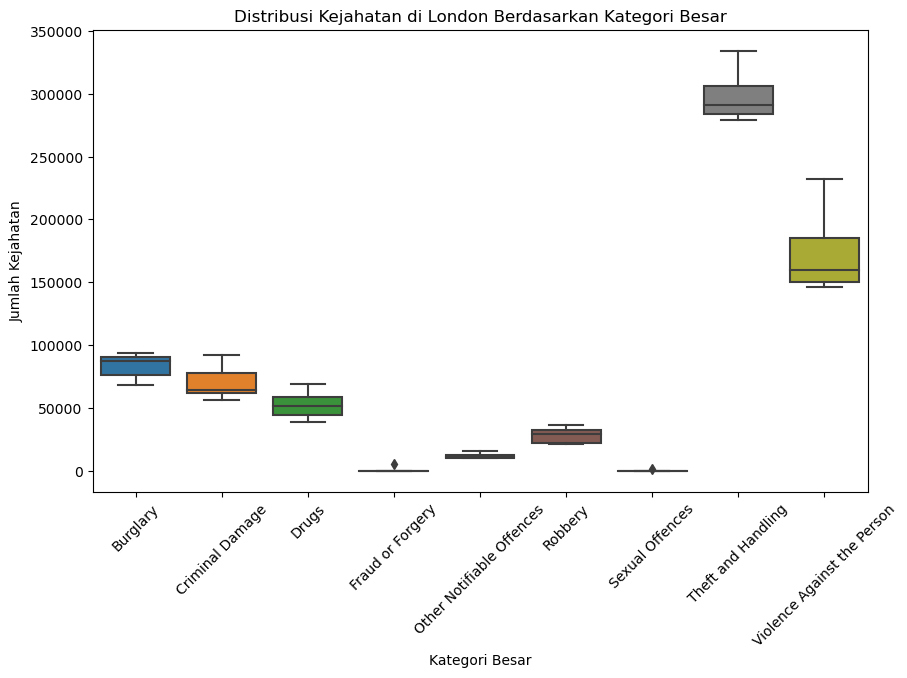

Hipotesis:
Kategori "Theft and Handling", "Violence Against the Person", dan "Criminal Damage" memiliki rentang nilai yang lebih lebar
Kategori "Drugs" dan "Other Notifiable Offenses" memiliki rentang nilai yang lebih sempit


In [66]:
data = df.groupby(['year', 'major_category']).sum().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(x='major_category', y='value', data=data)
plt.title('Distribusi Kejahatan di London Berdasarkan Kategori Besar')
plt.xlabel('Kategori Besar')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=45)
plt.show()

# Hipotesis spesifik untuk output boxplot
print('Hipotesis:')
print('Kategori "Theft and Handling", "Violence Against the Person", dan "Criminal Damage" memiliki rentang nilai yang lebih lebar')
print('Kategori "Drugs" dan "Other Notifiable Offenses" memiliki rentang nilai yang lebih sempit')


### Scatter Plot

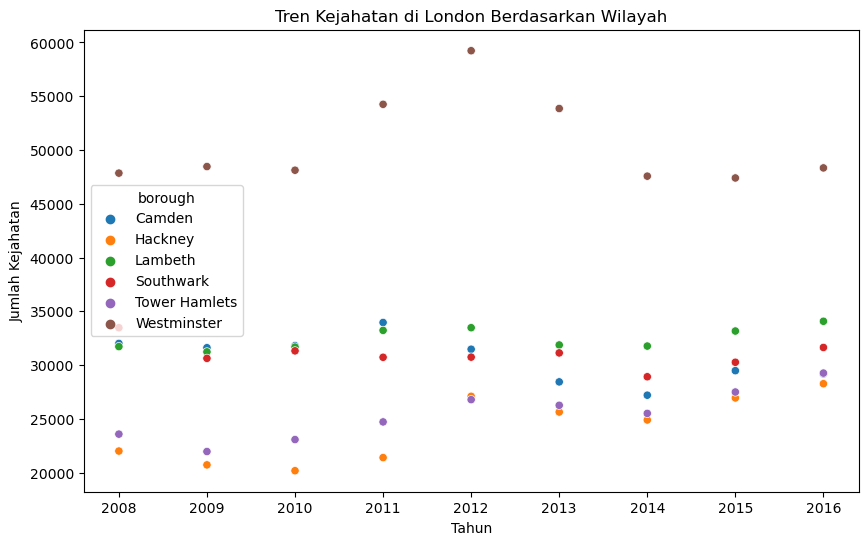

Hipotesis:
Wilayah Tower Hamlets dan Hackney mengalami penurunan jumlah kejahatan yang signifikan dari tahun 2011 hingga 2016, sementara wilayah Camden dan Southwark mengalami peningkatan jumlah kejahatan yang signifikan di periode yang sama.


In [67]:
data = df.groupby(['year', 'borough']).sum().reset_index()

boroughs = ['Westminster', 'Camden', 'Hackney', 'Lambeth', 'Tower Hamlets', 'Southwark']
data = data[data['borough'].isin(boroughs)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='value', hue='borough', data=data)
plt.title('Tren Kejahatan di London Berdasarkan Wilayah')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.show()

print('Hipotesis:')
print('Wilayah Tower Hamlets dan Hackney mengalami penurunan jumlah kejahatan yang signifikan dari tahun 2011 hingga 2016, sementara wilayah Camden dan Southwark mengalami peningkatan jumlah kejahatan yang signifikan di periode yang sama.')

### Wordclouds

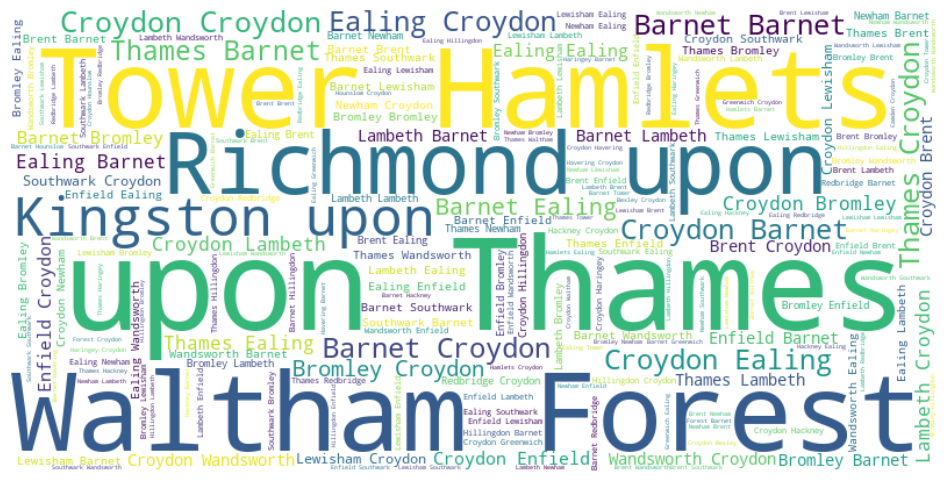

In [68]:
text = " ".join(df["borough"])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Folium Map

In [69]:
data = df.groupby("borough").sum().reset_index()

geo_data = "london_boroughs.json"

map = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=data,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Jumlah Kejahatan di London'
).add_to(map)

folium.LayerControl().add_to(map)
print('Hipotesis: ')
print('jumlah kejahatan di London terkonsentrasi di beberapa wilayah tertentu seperti Westminster, Southwark, dan Lambeth. Hal ini terlihat dari peta korelasi warna yang menunjukkan bahwa wilayah-wilayah tersebut memiliki intensitas warna yang lebih tinggi, yang menunjukkan jumlah kejahatan yang lebih besar dibandingkan dengan wilayah-wilayah lainnya. Selain itu, wilayah-wilayah ini umumnya merupakan pusat kota atau pusat kegiatan ekonomi dan sosial di London, yang mungkin membuat mereka lebih rentan terhadap tindakan kriminal.')

map

Hipotesis: 
jumlah kejahatan di London terkonsentrasi di beberapa wilayah tertentu seperti Westminster, Southwark, dan Lambeth. Hal ini terlihat dari peta korelasi warna yang menunjukkan bahwa wilayah-wilayah tersebut memiliki intensitas warna yang lebih tinggi, yang menunjukkan jumlah kejahatan yang lebih besar dibandingkan dengan wilayah-wilayah lainnya. Selain itu, wilayah-wilayah ini umumnya merupakan pusat kota atau pusat kegiatan ekonomi dan sosial di London, yang mungkin membuat mereka lebih rentan terhadap tindakan kriminal.
